# Bone Mineral Density Analysis

In [44]:
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [45]:
conn = MySQLdb.connect(host = 'localhost', user = 'root', passwd = 'mysql')

In [46]:
cursor = conn.cursor()

In [47]:
cursor.execute('use health_camp')

0

In [48]:
cursor.execute('select age, eating_habits, gender, Q29, Q30, Q31, Q32, Q33, Q34, Q35, Q36, Q37, Q38, R_BMD from profile, questions, reports where profile.P_Id = questions.P_Id and questions.R_Id = reports.R_Id and R_D != "NULL"')
BMD = pd.DataFrame(list(cursor.fetchall()), columns = ['Age', 'Eating Habits', 'Gender', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'R_BMD'])
BMD.head()

,Age,Eating Habits,Gender,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,R_BMD
0,38,Vegetarian,Male,1,0,0,0,Office,0,0.0,0.0,1,0.0,Osteopenia
1,51,Non - Vegetarian,Female,0,0,1,0,Office,1,0.0,0.0,0,0.0,None
2,15,Vegetarian,Female,1,0,1,0,None,0,0.0,1.0,0,0.0,Normal
3,16,Eggetarian,Female,1,0,1,0,None,0,0.0,1.0,0,0.0,Normal
4,55,Vegetarian,Female,0,1,1,0,Household,1,0.0,1.0,0,0.0,None


In [49]:
BMD.describe()

,Age,Q29,Q30,Q31,Q32,Q34,Q35,Q36,Q37,Q38
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,52.000000,45.000000,53.000000,52.000000
mean,50.962264,0.207547,0.509434,0.547170,0.037736,0.641509,0.442308,0.133333,0.226415,0.192308
std,17.275997,0.409432,0.504695,0.502533,0.192380,0.484146,0.501506,0.343776,0.422516,0.397959
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### BMD vs Eating Habits

In [50]:
BMD['Count'] = np.repeat(1, 53)
pivot = pd.pivot_table(BMD, values='Count', index=['R_BMD'], columns=['Eating Habits'], aggfunc=np.sum)
pivot.fillna(0, inplace = True)
pivot

Eating Habits,Eggetarian,Non - Vegetarian,Vegetarian
R_BMD,,,
Normal,2.0,1.0,11.0
Osteopenia,0.0,3.0,5.0
Osteoporotic,0.0,0.0,1.0


In [51]:
stat = stats.chi2_contingency(pivot)
stat

(4.439338235294118,
 0.34980111744913983,
 4,
 array([[ 1.2173913 ,  2.43478261, 10.34782609],
        [ 0.69565217,  1.39130435,  5.91304348],
        [ 0.08695652,  0.17391304,  0.73913043]]))

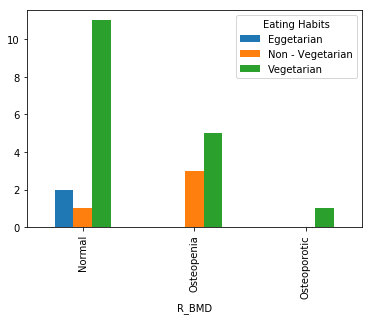

In [52]:
pivot.plot(kind='bar')

In [53]:
Total_BMD = [pivot.iloc[0, :] + pivot.iloc[1, :] + pivot.iloc[2, :]]
Total_BMD = pd.DataFrame(Total_BMD, index = ['Total BMD'])
piv = pivot.append(Total_BMD)
Total_EH = pivot['Eggetarian'] + pivot['Non - Vegetarian'] + pivot['Vegetarian']
piv['Total Eating Habits'] = Total_EH
Percentage_Norm = [(piv.iloc[0, :]/piv.iloc[3, :])*100]
Percentage_Ostpn = [(piv.iloc[1, :]/piv.iloc[3, :])*100]
Percentage_Ostpr = [(piv.iloc[2, :]/piv.iloc[3, :])*100]
Percentage_Norm = pd.DataFrame(Percentage_Norm, index = ['Percentage Normal'])
Percentage_Ostpn = pd.DataFrame(Percentage_Ostpn, index = ['Percentage Osteopenia'])
Percentage_Ostpr = pd.DataFrame(Percentage_Ostpr, index = ['Percentage Osteoporotic'])
Percentage_RE = (piv['Eggetarian']/piv['Total Eating Habits'])*100
Percentage_RNV = (piv['Non - Vegetarian']/piv['Total Eating Habits'])*100
Percentage_RV = (piv['Vegetarian']/piv['Total Eating Habits'])*100
piv = piv.append(Percentage_Norm)
piv = piv.append(Percentage_Ostpn)
piv = piv.append(Percentage_Ostpr)
piv['Percentage Eggetarian'] = Percentage_RE
piv['Percentage Non - Vegetarian'] = Percentage_RNV
piv['Pecentage Vegetarian'] = Percentage_RV
piv

Eating Habits,Eggetarian,Non - Vegetarian,Vegetarian,Total Eating Habits,Percentage Eggetarian,Percentage Non - Vegetarian,Pecentage Vegetarian
Normal,2.0,1.0,11.000000,14.0,14.285714,7.142857,78.571429
Osteopenia,0.0,3.0,5.000000,8.0,0.000000,37.500000,62.500000
Osteoporotic,0.0,0.0,1.000000,1.0,0.000000,0.000000,100.000000
Total BMD,2.0,4.0,17.000000,NaN,NaN,NaN,NaN
Percentage Normal,100.0,25.0,64.705882,NaN,NaN,NaN,NaN
Percentage Osteopenia,0.0,75.0,29.411765,NaN,NaN,NaN,NaN
Percentage Osteoporotic,0.0,0.0,5.882353,NaN,NaN,NaN,NaN


### BMD vs Gender

In [54]:
pivot1 = pd.pivot_table(BMD, values='Count', index=['R_BMD'], columns=['Gender'], aggfunc=np.sum)
pivot1.fillna(0, inplace = True)
pivot1

Gender,Female,Male
R_BMD,,
Normal,10.0,4.0
Osteopenia,3.0,5.0
Osteoporotic,1.0,0.0


In [55]:
stat1 = stats.chi2_contingency(pivot1)
stat1

(3.1325113378684804, 0.2088256326166509, 2, array([[8.52173913, 5.47826087],
        [4.86956522, 3.13043478],
        [0.60869565, 0.39130435]]))

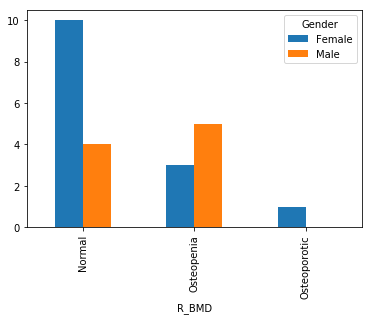

In [56]:
pivot1.plot(kind='bar')

In [57]:
Total_BMD = [pivot1.iloc[0, :] + pivot1.iloc[1, :] + pivot1.iloc[2, :]]
Total_BMD = pd.DataFrame(Total_BMD, index = ['Total BMD'])
piv = pivot1.append(Total_BMD)
Total_Gender = pivot1['Female'] + pivot1['Male']
piv['Total Gender'] = Total_Gender
Percentage_Norm = [(piv.iloc[0, :]/piv.iloc[3, :])*100]
Percentage_Ostpn = [(piv.iloc[1, :]/piv.iloc[3, :])*100]
Percentage_Ostpr = [(piv.iloc[2, :]/piv.iloc[3, :])*100]
Percentage_Norm = pd.DataFrame(Percentage_Norm, index = ['Percentage Normal'])
Percentage_Ostpn = pd.DataFrame(Percentage_Ostpn, index = ['Percentage Osteopenia'])
Percentage_Ostpr = pd.DataFrame(Percentage_Ostpr, index = ['Percentage Osteoporotic'])
Percentage_R0 = (piv['Female']/piv['Total Gender'])*100
Percentage_R1 = (piv['Male']/piv['Total Gender'])*100
piv = piv.append(Percentage_Norm)
piv = piv.append(Percentage_Ostpn)
piv = piv.append(Percentage_Ostpr)
piv['Percentage Female'] = Percentage_R0
piv['Percentage Male'] = Percentage_R1
piv

Gender,Female,Male,Total Gender,Percentage Female,Percentage Male
Normal,10.000000,4.000000,14.0,71.428571,28.571429
Osteopenia,3.000000,5.000000,8.0,37.500000,62.500000
Osteoporotic,1.000000,0.000000,1.0,100.000000,0.000000
Total BMD,14.000000,9.000000,NaN,NaN,NaN
Percentage Normal,71.428571,44.444444,NaN,NaN,NaN
Percentage Osteopenia,21.428571,55.555556,NaN,NaN,NaN
Percentage Osteoporotic,7.142857,0.000000,NaN,NaN,NaN


### BMD vs Junk Food Consumption

In [58]:
pivot2 = pd.pivot_table(BMD, values='Count', index=['R_BMD'], columns=['Q29'], aggfunc=np.sum)
pivot2.fillna(0, inplace = True)
pivot2

Q29,0,1
R_BMD,,
Normal,10.0,4.0
Osteopenia,5.0,3.0
Osteoporotic,1.0,0.0


In [59]:
stat2 = stats.chi2_contingency(pivot2)
stat2

(0.6490752551020408, 0.7228615076298761, 2, array([[9.73913043, 4.26086957],
        [5.56521739, 2.43478261],
        [0.69565217, 0.30434783]]))

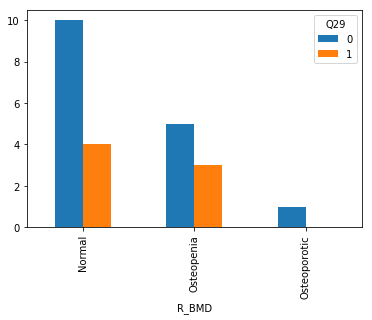

In [60]:
pivot2.plot(kind='bar')

In [61]:
Total_BMD = [pivot2.iloc[0, :] + pivot2.iloc[1, :] + pivot2.iloc[2, :]]
Total_BMD = pd.DataFrame(Total_BMD, index = ['Total BMD'])
piv = pivot2.append(Total_BMD)
Total_JFC = pivot2.iloc[:, 0] + pivot2.iloc[:, 1]
piv['Total JFC'] = Total_JFC
Percentage_Norm = [(piv.iloc[0, :]/piv.iloc[3, :])*100]
Percentage_Ostpn = [(piv.iloc[1, :]/piv.iloc[3, :])*100]
Percentage_Ostpr = [(piv.iloc[2, :]/piv.iloc[3, :])*100]
Percentage_Norm = pd.DataFrame(Percentage_Norm, index = ['Percentage Normal'])
Percentage_Ostpn = pd.DataFrame(Percentage_Ostpn, index = ['Percentage Osteopenia'])
Percentage_Ostpr = pd.DataFrame(Percentage_Ostpr, index = ['Percentage Osteoporotic'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total JFC'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total JFC'])*100
piv = piv.append(Percentage_Norm)
piv = piv.append(Percentage_Ostpn)
piv = piv.append(Percentage_Ostpr)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q29,0,1,Total JFC,Percentage 0,Percentage 1
Normal,10.00,4.000000,14.0,71.428571,28.571429
Osteopenia,5.00,3.000000,8.0,62.500000,37.500000
Osteoporotic,1.00,0.000000,1.0,100.000000,0.000000
Total BMD,16.00,7.000000,NaN,NaN,NaN
Percentage Normal,62.50,57.142857,NaN,NaN,NaN
Percentage Osteopenia,31.25,42.857143,NaN,NaN,NaN
Percentage Osteoporotic,6.25,0.000000,NaN,NaN,NaN


### BMD vs Supplement Consumptions

In [62]:
pivot3 = pd.pivot_table(BMD, values='Count', index=['R_BMD'], columns=['Q30'], aggfunc=np.sum)
pivot3.fillna(0, inplace = True)
pivot3

Q30,0,1
R_BMD,,
Normal,6.0,8.0
Osteopenia,3.0,5.0
Osteoporotic,0.0,1.0


In [63]:
stat3 = stats.chi2_contingency(pivot3)
stat3

(0.7334183673469388, 0.6930111547000772, 2, array([[5.47826087, 8.52173913],
        [3.13043478, 4.86956522],
        [0.39130435, 0.60869565]]))

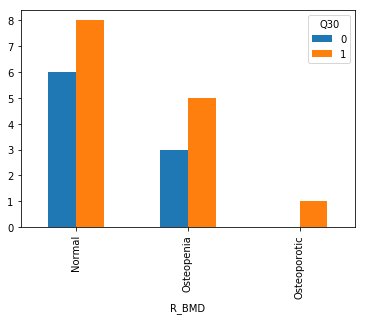

In [64]:
pivot3.plot(kind='bar')

In [65]:
Total_BMD = [pivot3.iloc[0, :] + pivot3.iloc[1, :] + pivot3.iloc[2, :]]
Total_BMD = pd.DataFrame(Total_BMD, index = ['Total BMD'])
piv = pivot3.append(Total_BMD)
Total_SC = pivot3.iloc[:, 0] + pivot3.iloc[:, 1]
piv['Total SC'] = Total_SC
Percentage_Norm = [(piv.iloc[0, :]/piv.iloc[3, :])*100]
Percentage_Ostpn = [(piv.iloc[1, :]/piv.iloc[3, :])*100]
Percentage_Ostpr = [(piv.iloc[2, :]/piv.iloc[3, :])*100]
Percentage_Norm = pd.DataFrame(Percentage_Norm, index = ['Percentage Normal'])
Percentage_Ostpn = pd.DataFrame(Percentage_Ostpn, index = ['Percentage Osteopenia'])
Percentage_Ostpr = pd.DataFrame(Percentage_Ostpr, index = ['Percentage Osteoporotic'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total SC'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total SC'])*100
piv = piv.append(Percentage_Norm)
piv = piv.append(Percentage_Ostpn)
piv = piv.append(Percentage_Ostpr)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q30,0,1,Total SC,Percentage 0,Percentage 1
Normal,6.000000,8.000000,14.0,42.857143,57.142857
Osteopenia,3.000000,5.000000,8.0,37.500000,62.500000
Osteoporotic,0.000000,1.000000,1.0,0.000000,100.000000
Total BMD,9.000000,14.000000,NaN,NaN,NaN
Percentage Normal,66.666667,57.142857,NaN,NaN,NaN
Percentage Osteopenia,33.333333,35.714286,NaN,NaN,NaN
Percentage Osteoporotic,0.000000,7.142857,NaN,NaN,NaN


### BMD vs Pain

In [66]:
pivot4 = pd.pivot_table(BMD, values='Count', index=['R_BMD'], columns=['Q31'], aggfunc=np.sum)
pivot4.fillna(0, inplace = True)
pivot4

Q31,0,1
R_BMD,,
Normal,5.0,9.0
Osteopenia,6.0,2.0
Osteoporotic,0.0,1.0


In [67]:
stat4 = stats.chi2_contingency(pivot4)
stat4

(4.107142857142858, 0.12827595611188142, 2, array([[6.69565217, 7.30434783],
        [3.82608696, 4.17391304],
        [0.47826087, 0.52173913]]))

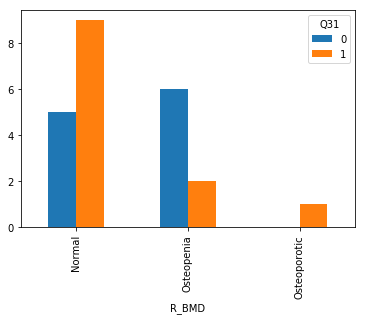

In [68]:
pivot4.plot(kind='bar')

In [69]:
Total_BMD = [pivot4.iloc[0, :] + pivot4.iloc[1, :] + pivot4.iloc[2, :]]
Total_BMD = pd.DataFrame(Total_BMD, index = ['Total BMD'])
piv = pivot4.append(Total_BMD)
Total_Pain = pivot4.iloc[:, 0] + pivot4.iloc[:, 1]
piv['Total Pain'] = Total_Pain
Percentage_Norm = [(piv.iloc[0, :]/piv.iloc[3, :])*100]
Percentage_Ostpn = [(piv.iloc[1, :]/piv.iloc[3, :])*100]
Percentage_Ostpr = [(piv.iloc[2, :]/piv.iloc[3, :])*100]
Percentage_Norm = pd.DataFrame(Percentage_Norm, index = ['Percentage Normal'])
Percentage_Ostpn = pd.DataFrame(Percentage_Ostpn, index = ['Percentage Osteopenia'])
Percentage_Ostpr = pd.DataFrame(Percentage_Ostpr, index = ['Percentage Osteoporotic'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total Pain'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total Pain'])*100
piv = piv.append(Percentage_Norm)
piv = piv.append(Percentage_Ostpn)
piv = piv.append(Percentage_Ostpr)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q31,0,1,Total Pain,Percentage 0,Percentage 1
Normal,5.000000,9.000000,14.0,35.714286,64.285714
Osteopenia,6.000000,2.000000,8.0,75.000000,25.000000
Osteoporotic,0.000000,1.000000,1.0,0.000000,100.000000
Total BMD,11.000000,12.000000,NaN,NaN,NaN
Percentage Normal,45.454545,75.000000,NaN,NaN,NaN
Percentage Osteopenia,54.545455,16.666667,NaN,NaN,NaN
Percentage Osteoporotic,0.000000,8.333333,NaN,NaN,NaN


### BMD vs RO Water Consumption

In [70]:
pivot5 = pd.pivot_table(BMD, values='Count', index=['R_BMD'], columns=['Q34'], aggfunc=np.sum)
pivot5.fillna(0, inplace = True)
pivot5

Q34,0,1
R_BMD,,
Normal,8.0,6.0
Osteopenia,2.0,6.0
Osteoporotic,1.0,0.0


In [71]:
stat5 = stats.chi2_contingency(pivot5)
stat5

(3.248376623376623, 0.19707157099338513, 2, array([[6.69565217, 7.30434783],
        [3.82608696, 4.17391304],
        [0.47826087, 0.52173913]]))

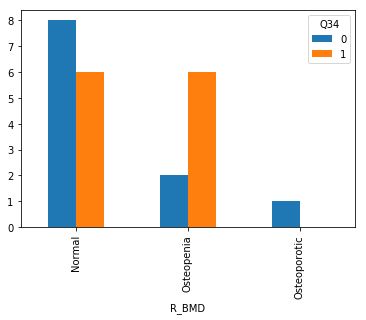

In [72]:
pivot5.plot(kind='bar')

In [73]:
Total_BMD = [pivot5.iloc[0, :] + pivot5.iloc[1, :] + pivot5.iloc[2, :]]
Total_BMD = pd.DataFrame(Total_BMD, index = ['Total BMD'])
piv = pivot5.append(Total_BMD)
Total_RO = pivot5.iloc[:, 0] + pivot5.iloc[:, 1]
piv['Total RO'] = Total_RO
Percentage_Norm = [(piv.iloc[0, :]/piv.iloc[3, :])*100]
Percentage_Ostpn = [(piv.iloc[1, :]/piv.iloc[3, :])*100]
Percentage_Ostpr = [(piv.iloc[2, :]/piv.iloc[3, :])*100]
Percentage_Norm = pd.DataFrame(Percentage_Norm, index = ['Percentage Normal'])
Percentage_Ostpn = pd.DataFrame(Percentage_Ostpn, index = ['Percentage Osteopenia'])
Percentage_Ostpr = pd.DataFrame(Percentage_Ostpr, index = ['Percentage Osteoporotic'])
Percentage_R0 = (piv.iloc[:, 0]/piv['Total RO'])*100
Percentage_R1 = (piv.iloc[:, 1]/piv['Total RO'])*100
piv = piv.append(Percentage_Norm)
piv = piv.append(Percentage_Ostpn)
piv = piv.append(Percentage_Ostpr)
piv['Percentage 0'] = Percentage_R0
piv['Percentage 1'] = Percentage_R1
piv

Q34,0,1,Total RO,Percentage 0,Percentage 1
Normal,8.000000,6.0,14.0,57.142857,42.857143
Osteopenia,2.000000,6.0,8.0,25.000000,75.000000
Osteoporotic,1.000000,0.0,1.0,100.000000,0.000000
Total BMD,11.000000,12.0,NaN,NaN,NaN
Percentage Normal,72.727273,50.0,NaN,NaN,NaN
Percentage Osteopenia,18.181818,50.0,NaN,NaN,NaN
Percentage Osteoporotic,9.090909,0.0,NaN,NaN,NaN


### BMD vs Age Group

In [74]:
Age_Group = []
for i in range(len(BMD['Age'])):
    if BMD.iloc[i, 0] <= 30:
        Age_Group.append('11 to 30')
    elif BMD.iloc[i, 0] <= 50:
        Age_Group.append('31 to 50')
    elif BMD.iloc[i, 0] <= 70:
        Age_Group.append('51 to 70')
    else:
        Age_Group.append('More than 70')

In [75]:
Age_Group = pd.DataFrame([Age_Group]).T
Age_Group

,0
0,31 to 50
1,51 to 70
2,11 to 30
3,11 to 30
4,51 to 70
5,More than 70
6,51 to 70
7,More than 70
8,31 to 50
9,31 to 50


In [76]:
BMD['Age_Group'] = Age_Group

In [77]:
BMD.head()

,Age,Eating Habits,Gender,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,R_BMD,Count,Age_Group
0,38,Vegetarian,Male,1,0,0,0,Office,0,0.0,0.0,1,0.0,Osteopenia,1,31 to 50
1,51,Non - Vegetarian,Female,0,0,1,0,Office,1,0.0,0.0,0,0.0,None,1,51 to 70
2,15,Vegetarian,Female,1,0,1,0,None,0,0.0,1.0,0,0.0,Normal,1,11 to 30
3,16,Eggetarian,Female,1,0,1,0,None,0,0.0,1.0,0,0.0,Normal,1,11 to 30
4,55,Vegetarian,Female,0,1,1,0,Household,1,0.0,1.0,0,0.0,None,1,51 to 70


In [78]:
pivot6 = pd.pivot_table(BMD, values='Count', index=['R_BMD'], columns=['Age_Group'], aggfunc=np.sum)
pivot6.fillna(0, inplace = True)
pivot6

Age_Group,11 to 30,31 to 50,51 to 70,More than 70
R_BMD,,,,
Normal,2.0,5.0,6.0,1.0
Osteopenia,0.0,2.0,5.0,1.0
Osteoporotic,0.0,0.0,1.0,0.0


In [79]:
stat6 = stats.chi2_contingency(pivot6)
stat6

(2.8896683673469385,
 0.8225618176508129,
 6,
 array([[1.2173913 , 4.26086957, 7.30434783, 1.2173913 ],
        [0.69565217, 2.43478261, 4.17391304, 0.69565217],
        [0.08695652, 0.30434783, 0.52173913, 0.08695652]]))

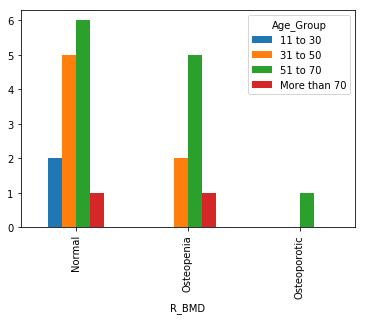

In [80]:
pivot6.plot(kind='bar')

In [81]:
Total_BMD = [pivot6.iloc[0, :] + pivot6.iloc[1, :] + pivot6.iloc[2, :]]
Total_BMD = pd.DataFrame(Total_BMD, index = ['Total BMD'])
piv = pivot6.append(Total_BMD)
Total_AG = pivot6['11 to 30'] + pivot6['31 to 50'] + pivot6['51 to 70'] + pivot6['More than 70']
piv['Total Age Groups'] = Total_AG
Percentage_Norm = [(piv.iloc[0, :]/piv.iloc[3, :])*100]
Percentage_Ostpn = [(piv.iloc[1, :]/piv.iloc[3, :])*100]
Percentage_Ostpr = [(piv.iloc[2, :]/piv.iloc[3, :])*100]
Percentage_Norm = pd.DataFrame(Percentage_Norm, index = ['Percentage Normal'])
Percentage_Ostpn = pd.DataFrame(Percentage_Ostpn, index = ['Percentage Osteopenia'])
Percentage_Ostpr = pd.DataFrame(Percentage_Ostpr, index = ['Percentage Osteoporotic'])
Percentage_R1 = (piv['11 to 30']/piv['Total Age Groups'])*100
Percentage_R2 = (piv['31 to 50']/piv['Total Age Groups'])*100
Percentage_R3 = (piv['51 to 70']/piv['Total Age Groups'])*100
Percentage_R4 = (piv['More than 70']/piv['Total Age Groups'])*100
piv = piv.append(Percentage_Norm)
piv = piv.append(Percentage_Ostpn)
piv = piv.append(Percentage_Ostpr)
piv['Percentage 11 to 30'] = Percentage_R1
piv['Percentage 31 to 50'] = Percentage_R2
piv['Percentage 51 to 70'] = Percentage_R3
piv['Percentage More than 70'] = Percentage_R4
piv

Age_Group,11 to 30,31 to 50,51 to 70,More than 70,Total Age Groups,Percentage 11 to 30,Percentage 31 to 50,Percentage 51 to 70,Percentage More than 70
Normal,2.0,5.000000,6.000000,1.0,14.0,14.285714,35.714286,42.857143,7.142857
Osteopenia,0.0,2.000000,5.000000,1.0,8.0,0.000000,25.000000,62.500000,12.500000
Osteoporotic,0.0,0.000000,1.000000,0.0,1.0,0.000000,0.000000,100.000000,0.000000
Total BMD,2.0,7.000000,12.000000,2.0,NaN,NaN,NaN,NaN,NaN
Percentage Normal,100.0,71.428571,50.000000,50.0,NaN,NaN,NaN,NaN,NaN
Percentage Osteopenia,0.0,28.571429,41.666667,50.0,NaN,NaN,NaN,NaN,NaN
Percentage Osteoporotic,0.0,0.000000,8.333333,0.0,NaN,NaN,NaN,NaN,NaN


### BMD vs Age Group Less than and Greater than 50

In [82]:
A_G = []
for i in range(len(BMD['Age'])):
    if BMD.iloc[i, 0] <= 50:
        A_G.append('Less than or equal to 50')
    else:
        A_G.append('More than 50')

In [83]:
A_G = pd.DataFrame([A_G]).T
A_G.head()

,0
0,Less than or equal to 50
1,More than 50
2,Less than or equal to 50
3,Less than or equal to 50
4,More than 50


In [85]:
BMD['A_G'] = A_G
pivot7 = pd.pivot_table(BMD, values='Count', index=['R_BMD'], columns=['A_G'], aggfunc=np.sum)
pivot7.fillna(0, inplace = True)
pivot7

A_G,Less than or equal to 50,More than 50
R_BMD,,
Normal,7.0,7.0
Osteopenia,2.0,6.0
Osteoporotic,0.0,1.0


In [86]:
stat7 = stats.chi2_contingency(pivot7)
stat7

(2.0079365079365075, 0.36642249479767164, 2, array([[5.47826087, 8.52173913],
        [3.13043478, 4.86956522],
        [0.39130435, 0.60869565]]))

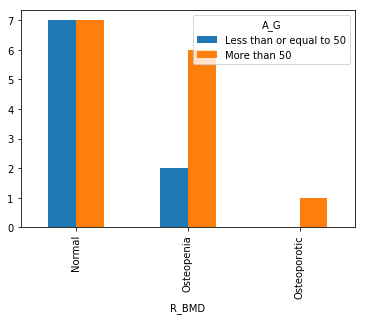

In [87]:
pivot7.plot(kind='bar')

In [89]:
Total_BMD = [pivot7.iloc[0, :] + pivot7.iloc[1, :]]
Total_BMD = pd.DataFrame(Total_BMD, index = ['Total BMD'])
piv = pivot7.append(Total_BMD)
Total_AG = pivot7['Less than or equal to 50'] + pivot7['More than 50']
piv['Total Age Groups'] = Total_AG
Percentage_0 = [(piv.iloc[0, :]/piv.iloc[3, :])*100]
Percentage_1 = [(piv.iloc[1, :]/piv.iloc[3, :])*100]
Percentage_2 = [(piv.iloc[2, :]/piv.iloc[3, :])*100]
Percentage_0 = pd.DataFrame(Percentage_0, index = ['Percentage Normal'])
Percentage_1 = pd.DataFrame(Percentage_1, index = ['Percentage Osteopenia'])
Percentage_2 = pd.DataFrame(Percentage_2, index = ['Percentage Osteoporotic'])
Percentage_R1 = (piv['Less than or equal to 50']/piv['Total Age Groups'])*100
Percentage_R2 = (piv['More than 50']/piv['Total Age Groups'])*100
piv = piv.append(Percentage_0)
piv = piv.append(Percentage_1)
piv = piv.append(Percentage_2)
piv['Percentage Less than or equal to 50'] = Percentage_R1
piv['Percentage More than 50'] = Percentage_R2
piv

A_G,Less than or equal to 50,More than 50,Total Age Groups,Percentage Less than or equal to 50,Percentage More than 50
Normal,7.000000,7.000000,14.0,50.0,50.0
Osteopenia,2.000000,6.000000,8.0,25.0,75.0
Osteoporotic,0.000000,1.000000,1.0,0.0,100.0
Total BMD,9.000000,13.000000,NaN,NaN,NaN
Percentage Normal,77.777778,53.846154,NaN,NaN,NaN
Percentage Osteopenia,22.222222,46.153846,NaN,NaN,NaN
Percentage Osteoporotic,0.000000,7.692308,NaN,NaN,NaN
